In [1]:
import nltk
nltk.download('punkt')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from matplotlib import style
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
import wordcloud
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [2]:
df = pd.read_csv("C:/Users/TEJ/Desktop/twitter.txt")
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [3]:
df.rename(columns = {'Unnamed':'Index'})
df.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [5]:
print(df["tweet"].iloc[0],"\n")
print(df["tweet"].iloc[1],"\n")
print(df["tweet"].iloc[2],"\n")
print(df["tweet"].iloc[3],"\n")
print(df["tweet"].iloc[4],"\n")

!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out... 

!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!! 

!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit 

!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny 

!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361; 



In [6]:
# To remove the unnecessary special characters from the tweet
# DATA PROCESSING
def data_processing(tweet):
    tweet = tweet.lower()  # converting all the characters into lower case
    twwet = re.sub(r"https\$+|www\$+http\$+",'',tweet,flags=re.MULTILINE) #removing urls
    tweet = re.sub(r'\@w+|\#','',tweet) # removing hash tags 
    tweet = re.sub(r'[^\w\s]','',tweet) #removing all punctuations
    tweet = re.sub(r'ð','',tweet)
    tweet_tokens = word_tokenize(tweet) #removing all the stopwords
    filtered_tweets = [w for w in tweet_tokens if not w in stop_words]
    return " ".join(filtered_tweets)

In [7]:
df.tweet = df['tweet'].apply(data_processing)

In [8]:
df.drop_duplicates('tweet')

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,rt mayasolovely woman shouldnt complain cleani...
1,1,3,0,3,0,1,rt mleew17 boy dats coldtyga dwn bad cuffin da...
2,2,3,0,3,0,1,rt urkindofbrand dawg rt 80sbaby4life ever fuc...
3,3,3,0,2,1,1,rt c_g_anderson viva_based look like tranny
4,4,6,0,6,0,1,rt shenikaroberts shit hear might true might f...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,yous muthafin lie 8220lifeasking 20_pearls cor...
24779,25292,3,0,1,2,2,youve gone broke wrong heart baby drove rednec...
24780,25294,3,0,3,0,1,young buck wan na eat dat nigguh like aint fuc...
24781,25295,6,0,6,0,1,youu got wild bitches tellin lies


In [9]:
lemmatizer = WordNetLemmatizer()
def lemmatizing(data):
    tweet = [lemmatizer.lemmatize(word) for word in data]
    return data

In [10]:
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [11]:
nltk.download('omw-1.4')

[nltk_data] Error loading omw-1.4: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [12]:
df["tweet"] = df["tweet"].apply(lambda x: lemmatizing(x))

In [13]:
print(df["tweet"].iloc[0],"\n")
print(df["tweet"].iloc[1],"\n")
print(df["tweet"].iloc[2],"\n")
print(df["tweet"].iloc[3],"\n")
print(df["tweet"].iloc[4],"\n")
print(df["tweet"].iloc[56],"\n")

rt mayasolovely woman shouldnt complain cleaning house amp man always take trash 

rt mleew17 boy dats coldtyga dwn bad cuffin dat hoe 1st place 

rt urkindofbrand dawg rt 80sbaby4life ever fuck bitch start cry confused shit 

rt c_g_anderson viva_based look like tranny 

rt shenikaroberts shit hear might true might faker bitch told ya 57361 

128514128514128514the_paradox ima steal cat n replace pitbull 128514128514128514128514 rt 80sbaby4life the_paradox bitch 



In [14]:
df['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

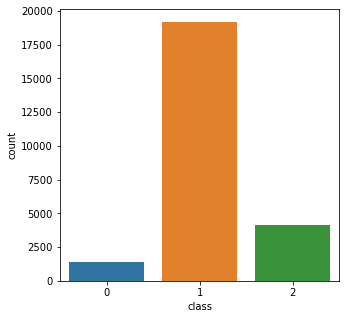

In [15]:
#VISUALIZING DATA
fig = plt.figure(figsize=(5,5))
sns.countplot(x='class',data=df)

Text(0.5, 1.0, 'Distribution of Sentiments')

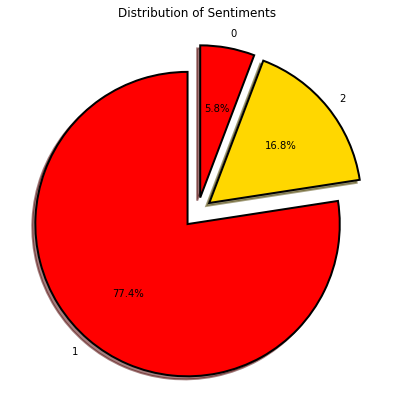

In [16]:
fig = plt.figure(figsize=(7,7))
colors = ("red","gold")
wp = {'linewidth':2,'edgecolor':"black"}
tags = df['class'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie',autopct='%1.1f%%',shadow=True,colors=colors,startangle=90,wedgeprops=wp,explode=explode,label='')
plt.title("Distribution of Sentiments")

In [17]:
hate_tweets = df[df["class"]==0]
hate_tweets.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
85,85,3,2,1,0,0,blackman38tide halelookyhere howdydowdy11 quee...
89,90,3,3,0,0,0,cb_baby24 hite_thunduh alsarabsss hes beaner s...
110,111,3,3,0,0,0,devilgrimz vigxrarts youre fucking gay blackli...
184,186,3,3,0,0,0,markroundtreejr lmfaoooo hate black people htt...
202,204,3,2,1,0,0,nochillpaz least im nigger httptcorgja7cfoit l...


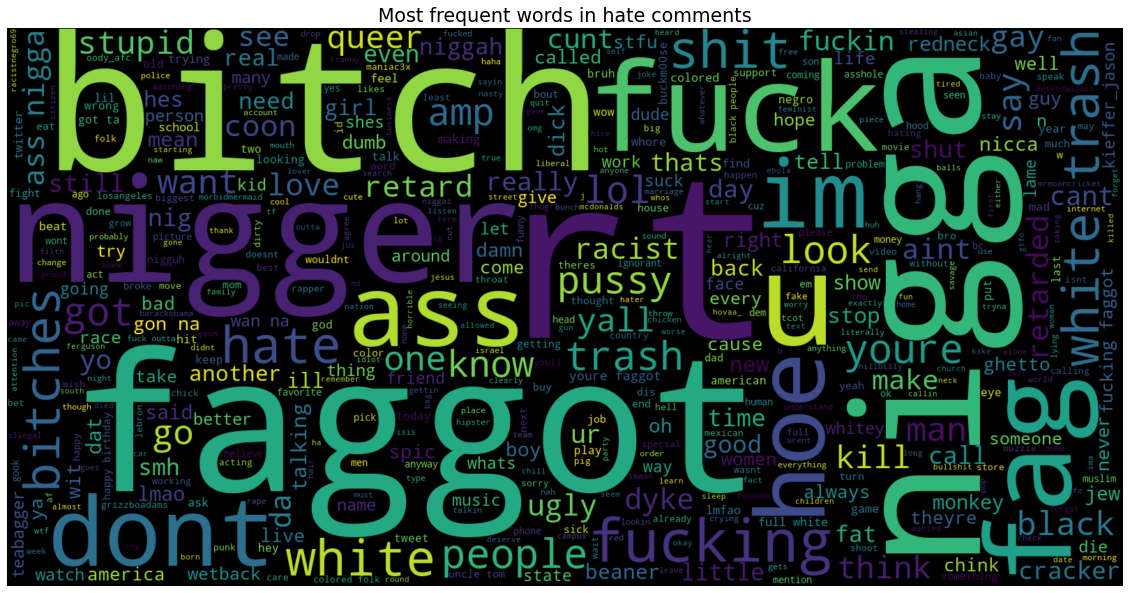

In [18]:
text = ' '.join([word for word in hate_tweets['tweet']])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud = WordCloud(max_words = 500, width=1600,height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most frequent words in hate comments",fontsize=19)
plt.show()

In [19]:
df.dropna(axis=0,thresh=1)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,rt mayasolovely woman shouldnt complain cleani...
1,1,3,0,3,0,1,rt mleew17 boy dats coldtyga dwn bad cuffin da...
2,2,3,0,3,0,1,rt urkindofbrand dawg rt 80sbaby4life ever fuc...
3,3,3,0,2,1,1,rt c_g_anderson viva_based look like tranny
4,4,6,0,6,0,1,rt shenikaroberts shit hear might true might f...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,yous muthafin lie 8220lifeasking 20_pearls cor...
24779,25292,3,0,1,2,2,youve gone broke wrong heart baby drove rednec...
24780,25294,3,0,3,0,1,young buck wan na eat dat nigguh like aint fuc...
24781,25295,6,0,6,0,1,youu got wild bitches tellin lies


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(ngram_range=(1,2)).fit(df['tweet'])

In [21]:
feature_names = vect.get_feature_names()
print("Number of features:{} \n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:20]))

Number of features:189760 

First 20 features: 
['007', '007 httptcoon5t60rmfb', '007beardownjedi', '007beardownjedi afl', '007hertzrumble', '007hertzrumble httptcoqyn1bc7mxs', '007m_h', '007m_h lilduval', '00_jackie', '00_jackie darknight420', '00_jackie wan', '00sexilexi00', '00sexilexi00 bitch', '00sexilexi00 freeze', '00sexilexi00 httptcop3heuboqbu', '00sexilexi00 nigga', '00sexilexi00 socass_', '00sexilexi00 swiggety', '01', '01 going']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [22]:
x = df['tweet']
y = df['class']
x = vect.transform(x)

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [24]:
print("size of x_train:",(x_train.shape))
print("size of y_train:",(y_train.shape))
print("size of x_test:",(x_test.shape))
print("size of y_test:",(y_test.shape))

size of x_train: (19826, 189760)
size of y_train: (19826,)
size of x_test: (4957, 189760)
size of y_test: (4957,)


In [25]:
from sklearn.metrics import accuracy_score
logreg = DecisionTreeClassifier()
logreg.fit(x_train,y_train)
logreg_predict = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_predict,y_test)
print(logreg_acc*100)

88.13798668549526


In [26]:
#0: "Hate Speech", 
#1: "Offensive Language"
#2: "No Hate and Offensive"
sample ="Hitler was right, I hate jews."
data = vect.transform([sample]).toarray() 
output = logreg.predict(data)
if output == 0:
    print("Hate Speech")
elif output == 1:
    print("Offensive speech")
else:
    print("No Hate and Offensive")

Hate Speech


In [27]:
offensive_tweets = df[df["class"]==1]
offensive_tweets.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
1,1,3,0,3,0,1,rt mleew17 boy dats coldtyga dwn bad cuffin da...
2,2,3,0,3,0,1,rt urkindofbrand dawg rt 80sbaby4life ever fuc...
3,3,3,0,2,1,1,rt c_g_anderson viva_based look like tranny
4,4,6,0,6,0,1,rt shenikaroberts shit hear might true might f...
5,5,3,1,2,0,1,t_madison_x shit blows meclaim faithful somebo...


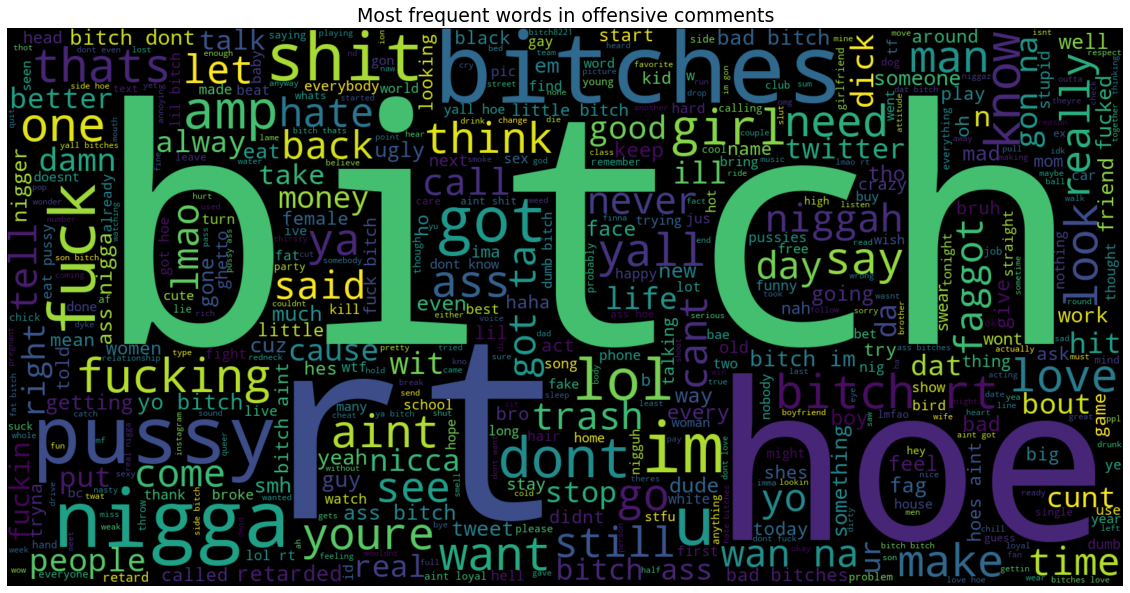

In [28]:
text = ' '.join([word for word in offensive_tweets['tweet']])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud = WordCloud(max_words = 500, width=1600,height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most frequent words in offensive comments",fontsize=19)
plt.show()

In [29]:
no_hate_and_offensive_tweets = df[df["class"]==2]
no_hate_and_offensive_tweets.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,rt mayasolovely woman shouldnt complain cleani...
40,40,3,0,1,2,2,momma said pussy cats inside doghouse
63,63,3,0,0,3,2,addicted2guys simplyaddictedtoguys httptco1jl4...
66,66,3,0,1,2,2,allaboutmanfeet httptco3gzupfumev woof woof ho...
67,67,3,0,1,2,2,allyhaaaaa lemmie eat oreo amp dishes one oreo...


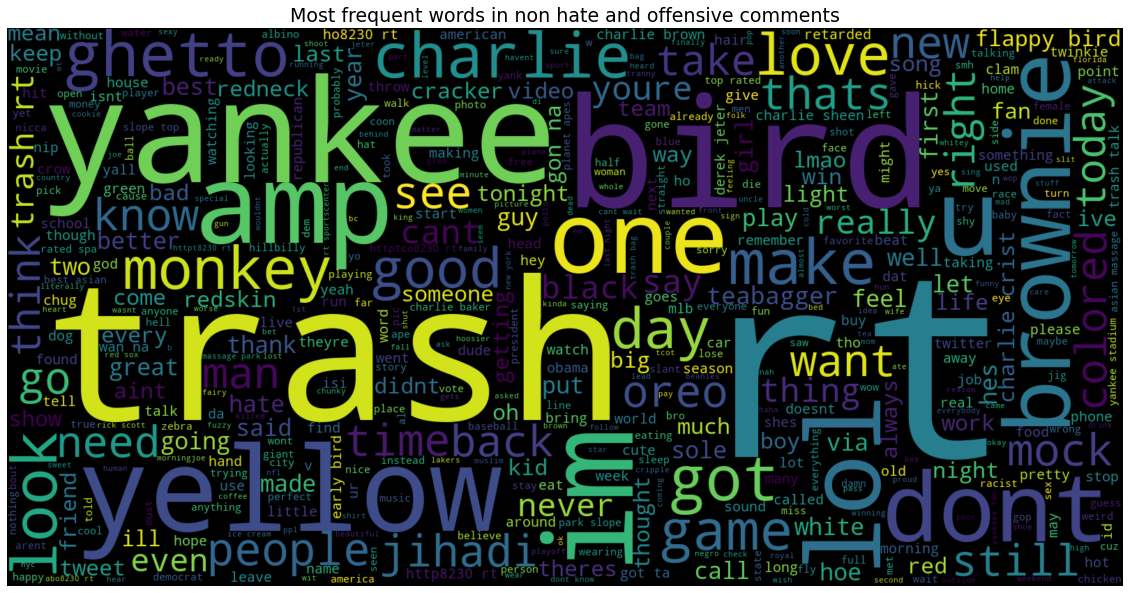

In [30]:
text = ' '.join([word for word in no_hate_and_offensive_tweets['tweet']])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud = WordCloud(max_words = 500, width=1600,height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most frequent words in non hate and offensive comments",fontsize=19)
plt.show()

In [31]:
df["tweet"]

0        rt mayasolovely woman shouldnt complain cleani...
1        rt mleew17 boy dats coldtyga dwn bad cuffin da...
2        rt urkindofbrand dawg rt 80sbaby4life ever fuc...
3              rt c_g_anderson viva_based look like tranny
4        rt shenikaroberts shit hear might true might f...
                               ...                        
24778    yous muthafin lie 8220lifeasking 20_pearls cor...
24779    youve gone broke wrong heart baby drove rednec...
24780    young buck wan na eat dat nigguh like aint fuc...
24781                    youu got wild bitches tellin lies
24782    ruffled ntac eileen dahlia beautiful color com...
Name: tweet, Length: 24783, dtype: object